<a href="https://colab.research.google.com/github/Alessandro-Castelli/Small-Project/blob/main/Dataset4A.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [4]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import seaborn as sns
import numpy as np
import math
from google.colab import files

In [ ]:
#uploaded = files.upload()
# Load the dataset 4: 30 Years of European Solar Generation
# 1 row = 1 hour
# df4 = pd.read_csv(next(iter(uploaded)))
df4 = pd.read_csv("/EMHIRESPV_TSh_CF_Country_19862015.csv")

# Displays the first 5 rows of the dataset
print("------------------------------------------------------First 5 rows of the dataset---------------------------------------")
print(df4.head())

# General information about the dataset
print("------------------------------------------------General information about the dataset---------------------------------------")
print(df4.info())

# Descriptive statistics
print("------------------------------------------------Descriptive statistics------------------------------------------")
print(df4.describe())

# Counting unique values ​​for each column
print("------------------------------------------------Counting unique values ​​for each column---------------------------------------")
for col in df4.columns:
    print(f'{col}: {df4[col].nunique()} unique value')

# Study the correlation between the columns
print("-------------------------------------------------------Correlation-----------------------------------------------------")
df4_numerico = df4.select_dtypes(include=[np.number])
correlazione = df4_numerico.corr()
print(correlazione)

In [ ]:
# Create a histogram for each column (each conutry)
for column in df4.columns:
    df4[column].hist()
    plt.title(column)
    plt.show()

In [ ]:
print("-------------------------------------------Correlation Matrix-----------------------------------------")
dfon4 = df4.select_dtypes(include=['number'])  # Only numerical columns
correlation_matrix = dfon4.corr()

plt.figure(figsize=(20, 16))  # Figure size

# Use seaborn to create a heatmap of the correlation matrix
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5)

# Title
plt.title('Correlation Matrix')

# Show
plt.show()

In order to understand the following section, please read the following.
Each row in the dataset represents the solar energy production for one hour. The dataset contains 262,968 rows, spanning a time period of approximately 30 years (from 1986 to 2015). By analyzing each column in the dataset, we can reconstruct the energy history of each country over a 30-year period

#How to interpret the acronyms?
 AT = AUSTRIA \\
 BE = BELGIUM \\
 BG = BULGARIA \\
 CH = SWITZERLAND \\
 CY = CYPRUS \\
 CZ = CZECH REPUBLIC \\
 DE = GERMANY \\
 DK = DENMARK \\
 EE = ESTONIA \\
 ES = SPAIN  \\
 FI = FINLAND \\
 FR = FRANCE \\
 EL = GREECE \\
 HR = CROATIA \\
 HU = HUNGARY \\
 IE = IRELAND \\
 IT = ITALY \\
 LT = LITHUANIA \\
 LU = LUXEMBURG \\
 LV = LATVIA \\
 NL = NETHERLANDS \\
 NO = NORWAY \\
 PL = POLAND \\
 PT = PORTUGAL \\
 RO = ROMANIA \\
 SI = SLOVENIA \\
 SK = SLOVAKIA \\
 SE = SWEDEN \\
 UK = UNITED KINGDOM



In [ ]:
# Crea un mini-dataset per ogni colonna
mini_datasets = {}
for column in df4.columns:
    mini_datasets[column] = pd.DataFrame(df4[column])

total_entries = 262968

# Crea un indice di tempo per 30 anni, con un'unità di tempo ogni ora
time_index = pd.date_range(start="01-01-1986", periods=total_entries, freq='H')

# Calcola il numero totale di anni
total_years = 30

# Calcola il numero di righe per ciascun anno
entries_per_year = total_entries // total_years

# Crea e visualizza i grafici temporali per ciascuna colonna con suddivisione per anno
for column, mini_dataset in mini_datasets.items():
    plt.figure(figsize=(60, 30))

    # Calcola il numero di righe per ciascun grafico (anno)
    rows = math.ceil(total_years / 2)
    columns = 2

    for year in range(total_years):
        plt.subplot(rows, columns, year + 1)
        start_idx = year * entries_per_year
        end_idx = (year + 1) * entries_per_year

        plt.plot(time_index[start_idx:end_idx], mini_dataset[start_idx:end_idx])
        plt.title(f"YEAR {year + 1}")
        plt.xlabel("TIME")
        plt.ylabel(column)
        plt.grid()

    plt.suptitle(f"TEMPORAL GRAPHICS: {column}")
    plt.tight_layout(rect=[0, 0, 1, 0.95])

    plt.show()

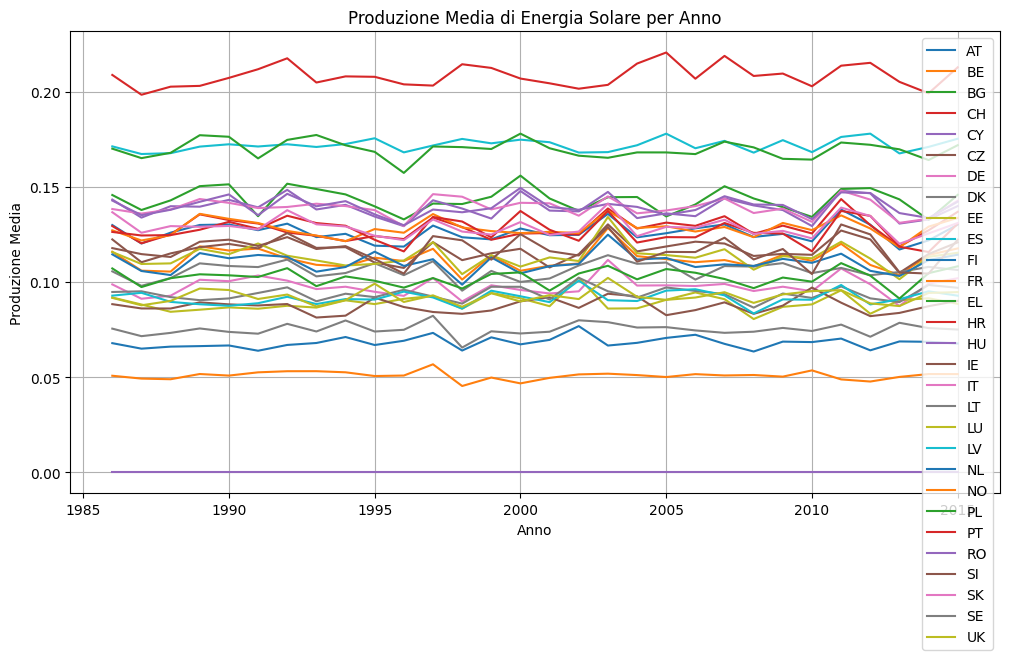

In [20]:
# Inizializza una lista per memorizzare i valori medi per ciascun anno
average_values = {column: [] for column in mini_datasets}

# Calcola i valori medi per ciascun anno
for year in range(total_years):
    start_idx = year * entries_per_year
    end_idx = (year + 1) * entries_per_year
    for column, mini_dataset in mini_datasets.items():
        yearly_data = mini_dataset[start_idx:end_idx]
        average_value = yearly_data.mean().values[0]
        average_values[column].append(average_value)

# Crea un grafico dei valori medi per ciascun anno
plt.figure(figsize=(12, 6))
for column, values in average_values.items():
    plt.plot(range(1986, 2016), values, label=column)

plt.title("Produzione Media di Energia Solare per Anno")
plt.xlabel("Anno")
plt.ylabel("Produzione Media")
plt.legend(loc="upper right")
plt.grid()

plt.show()


In the following section, you will find the same graphs year by year as in the previous section, but displayed in an alternative way

In [ ]:
# Crea e visualizza i grafici temporali per ciascuna colonna con dimensioni personalizzate
for column, mini_dataset in mini_datasets.items():
    total_years = 30
    entries_per_year = total_entries // total_years

    for year in range(total_years):
        start_idx = year * entries_per_year
        end_idx = (year + 1) * entries_per_year

        # Specifica le dimensioni del grafico per ciascun anno
        figsize = (100, 5)  # Personalizza le dimensioni del grafico

        plt.figure(figsize=figsize)
        plt.plot(time_index[start_idx:end_idx], mini_dataset[start_idx:end_idx])
        plt.title(f"Grafico Temporale - {column}, Anno {year + 1}")
        plt.xlabel("Tempo")
        plt.ylabel(column)
        plt.grid()
        plt.show()

Statistics for 0 - 9:
Country: AT
Mean Production: 0.12615749165630857
Median Production: 0.0
Min Production: 0.0
Max Production: 0.7153025563325559


Country: BE
Mean Production: 0.11215859559252547
Median Production: 0.0
Min Production: 0.0
Max Production: 0.8275076642018271


Country: BG
Mean Production: 0.1432619897863557
Median Production: 0.0
Min Production: 0.0
Max Production: 0.8740002975553709


Country: CH
Mean Production: 0.12837925604271463
Median Production: 0.0
Min Production: 0.0
Max Production: 0.729027297147297


Country: CY
Mean Production: 0.0
Median Production: 0.0
Min Production: 0
Max Production: 0


Country: CZ
Mean Production: 0.11699142156302364
Median Production: 0.0
Min Production: 0.0
Max Production: 0.8391680019351719


Country: DE
Mean Production: 0.09775458609370094
Median Production: 0.00117714181336195
Min Production: 0.0
Max Production: 0.665372109125087


Country: DK
Mean Production: 0.10614103570747581
Median Production: 0.0
Min Production: 0.0
Max P

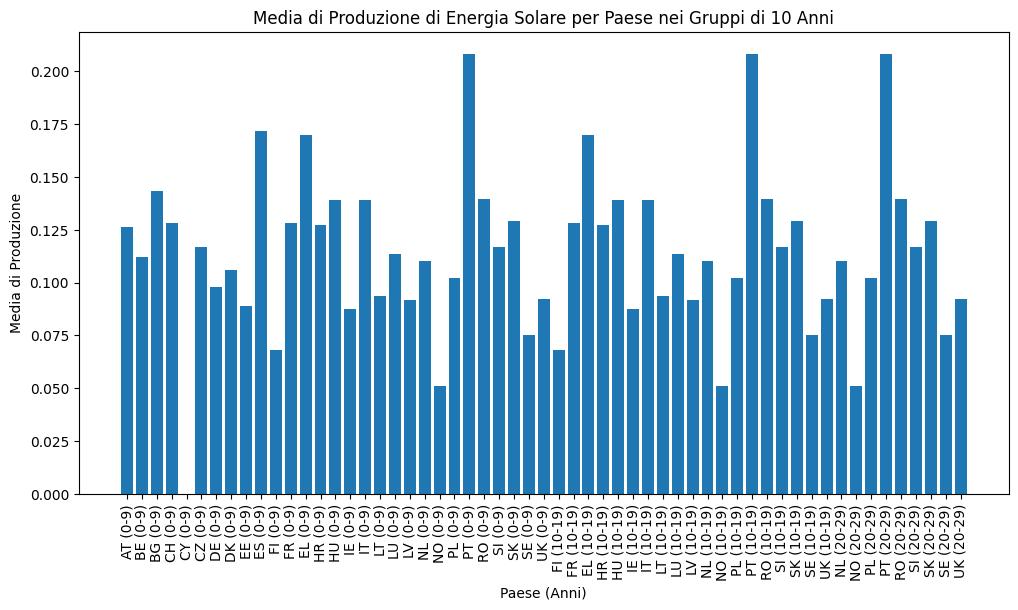

In [19]:
# Supponiamo che il tuo dataset sia un DataFrame chiamato 'df' con colonne per ciascun paese e righe per ogni ora per 30 anni.

# Dividi il dataset in finestre di 10 anni
years_per_group = 10
grouped_data = [df4.iloc[:, i:i+years_per_group*365*24].copy() for i in range(0, len(df4.columns), years_per_group)]

# Calcola le statistiche per ogni gruppo di 10 anni per ciascun paese
for i, group in enumerate(grouped_data):
    start_year = i * years_per_group
    end_year = start_year + years_per_group - 1
    print(f"Statistics for {start_year} - {end_year}:")

    for country in group.columns:
        mean_production = group[country].mean()
        median_production = group[country].median()
        min_production = group[country].min()
        max_production = group[country].max()

        print(f"Country: {country}")
        print(f"Mean Production: {mean_production}")
        print(f"Median Production: {median_production}")
        print(f"Min Production: {min_production}")
        print(f"Max Production: {max_production}")
        print("\n")


# Crea una lista delle medie di produzione per ciascun paese nei gruppi di 10 anni
mean_production_data = []

for i, group in enumerate(grouped_data):
    for country in group.columns:
        mean_production = group[country].mean()
        mean_production_data.append((f"{country} ({i * years_per_group}-{(i + 1) * years_per_group - 1})", mean_production))

# Estrai i nomi dei paesi e le medie di produzione
countries = [item[0] for item in mean_production_data]
mean_values = [item[1] for item in mean_production_data]

# Crea un grafico a barre per rappresentare le medie di produzione
plt.figure(figsize=(12, 6))
plt.bar(countries, mean_values)
plt.xticks(rotation=90)
plt.xlabel("Paese (Anni)")
plt.ylabel("Media di Produzione")
plt.title("Media di Produzione di Energia Solare per Paese nei Gruppi di 10 Anni")
plt.show()
